Phishing website detection using machine learning.
Scikit-learn in Python.

Dataset: From UCI, developed by Mohammad et al.
Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00327/

The dataset comes in an 'arff' format, which is not the most convenient format to use with scikit-learn. 
Converting to the csv format using an online tool is simple. Both csv and arff files are available in the repo.

In [1]:
import pandas as pd
import numpy as np

Make a dataframe from the csv file

In [2]:
df = pd.read_csv("training_dataset.csv")

A look at the dataset.

In [3]:
df

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1


Extract results.

In [5]:
y = df["Result"]
#convert it into a numpy array
y = np.array(y)
#dimensions of y
y.shape

(11055,)

Extract feature names.

In [22]:
feature_list = list(df)
feature_list.pop(0)  #to remove the unneccessary id column
feature_list.pop()   #to remove the result column

'Result'

In [23]:
print(feature_list)

['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report']


Extract observations (without result).

In [24]:
#capital 'X' to denote a matrix
X = df[feature_list]
#convert into a numpy array
X = np.array(X)
print(X.shape)

(11055, 30)


Split the dataset into training and test examples.

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)  #random state specified to be able to reproduce this particular split of the dataset.

Training a logistic regression model (since this a classification problem).

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

Checking the performance with default value of C.

In [28]:
print("Training set accuracy: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(logreg.score(X_test,y_test)))

Training set accuracy: 0.931
Test set accuracy: 0.922


The accuracy is not great, and training and test accuracy are close. Probably a case of underfitting (too simple model). To decrease underfitting, parameter C needs to be increased.

In [36]:
logreg100 = LogisticRegression(C=100)
logreg100.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test,y_test)))

Training set accuracy: 0.931
Test set accuracy: 0.922


Looks like this is the best we can get from logistic regression. Try random forest next.

Before that, let's look at the feature weights computed by the above logistic regression models. Higher value of C corresponds to less regularization (less general model, model tries to fit the training set best). Less regularization means some features are given too much importance while some might not be considered at all.

(-5.0, 5.0)

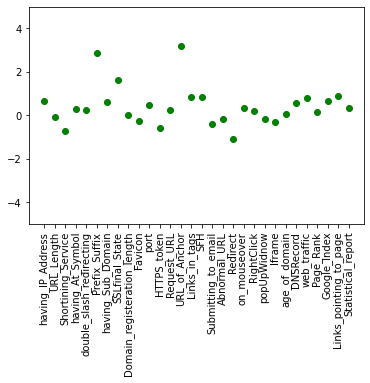

In [49]:
import matplotlib.pyplot as plt
plt.plot(logreg.coef_.T,'og',label="C=1")   #for the first model (with default value of C)
plt.xticks(range(len(feature_list)),feature_list,rotation=90)
plt.ylim(-5,5)

(-10.0, 10.0)

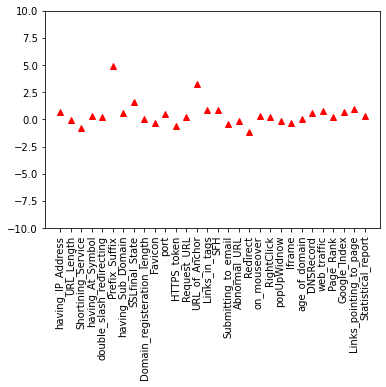

In [52]:
plt.plot(logreg100.coef_.T,'^r',label="C=100")   #for the second model (less regularization)
plt.xticks(range(len(feature_list)),feature_list,rotation=90)
plt.ylim(-10,10)

Not very significant, but some features in the second case have higher weight than in the first case (prefix_suffix). Take a look at the case below when regularization is high.

(-5.0, 5.0)

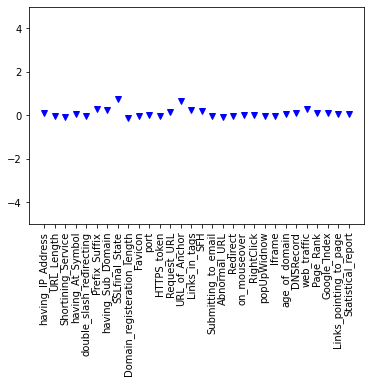

In [55]:
logreg001= LogisticRegression(C=0.001)  #high regularization (most feature weights (importances) should be close to zero)
logreg001.fit(X_train,y_train)
plt.plot(logreg001.coef_.T,'vb',label="C=0.001")
plt.xticks(range(len(feature_list)),feature_list,rotation=90)
plt.ylim(-5,5)

Let's move on to the random forest now.

In [56]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
print("Training set accuracy: {:.3f}".format(forest.score(X_train,y_train)))
print("Test set accuracy: {:.3f}".format(forest.score(X_test,y_test)))

Training set accuracy: 0.991
Test set accuracy: 0.966


With 99% training accuracy, the model is too complex and is overfitting. To reduce overfitting, we can either limit the depth of trees or the features that each node can choose from. Try limiting depth.

In [71]:
forest15 = RandomForestClassifier(max_depth=15)
forest15.fit(X_train,y_train)
print("Training set accuracy with limited depth: {:.3f}".format(forest15.score(X_train,y_train)))
print("Test set accuracy with limited depth: {:.3f}".format(forest15.score(X_test,y_test)))

Training set accuracy with limited depth: 0.986
Test set accuracy with limited depth: 0.967


The model is less complex with almost identical test accuracy. Random forest is better than logistic regression at predicting which sites are phishing and which are not for our particular dataset.

Let's try SVM next.

In [65]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
print("Training set accuracy: {:.3f}".format(svm.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(svm.score(X_test,y_test)))

Training set accuracy: 0.955
Test set accuracy: 0.944


Looks like the model is underfitting. Let's make it a bit more complex. Increase C (less regularization, less restricted model).

In [78]:
svm20 = SVC(C=20)
svm20.fit(X_train,y_train)
print("Training set accuracy with less regularization: {:.3f}".format(svm20.score(X_train,y_train)))
print("Test set accuracy with less regularization: {:.3f}".format(svm20.score(X_test,y_test)))

Training set accuracy with less regularization: 0.980
Test set accuracy with less regularization: 0.963


To better understand how each model is performing, let's now calculate confusion matrix for each.

In [75]:
from sklearn.metrics import confusion_matrix
def cnf_matrix(model,X_test,y_test):
    """Return the confusion matrix for a 'model'."""
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test,y_pred)

In [79]:
print("Logistic Regression","\n\n",cnf_matrix(logreg,X_test,y_test),"\n\n\n")
print("Random Forest","\n\n",cnf_matrix(forest15,X_test,y_test),"\n\n\n")
print("SVM","\n\n",cnf_matrix(svm10,X_test,y_test),"\n\n\n")

Logistic Regression 

 [[1070  113]
 [ 102 1479]] 



Random Forest 

 [[1121   62]
 [  29 1552]] 



SVM 

 [[1117   66]
 [  36 1545]] 





False negative is an observation that is incorrectly classified as negative (in our case, not phishing). This is the most crucial part of our confusion matrix. Because we do not want to flag a site legitimate that is actually phishing, marking a site phishing when it is not (false positive) might not have as dire consequences.

Calculate f1_score for each model

In [77]:
from sklearn.metrics import f1_score
def f1(model,X_test,y_test):
    """Return the confusion matrix for a 'model'."""
    y_pred = model.predict(X_test)
    return f1_score(y_test,y_pred)

In [81]:
print("f1 logistic regression: {:.3f}".format(f1(logreg,X_test,y_test)))
print("f1 random forest: {:.3f}".format(f1(forest15,X_test,y_test)))
print("f1 svm: {:.3f}".format(f1(svm20,X_test,y_test)))

f1 logistic regression: 0.932
f1 random forest: 0.972
f1 svm: 0.968


Both in terms of false negatives and the f1 score, random forest outperforms logistic regression and svm.